### Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

### Initializing the dataset

In [3]:
df = pd.read_csv('pubg.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


### Kills per Person

In [7]:
df['kills'].mean()
# average kill per person is 1.

0.9212759937756401

In [8]:
df['kills'].quantile(0.8)
# 80% of players have 2 or less than 2 kills per game.

2.0

In [9]:
df['kills'].max()
# maximum number of kills by a single player is 72.

21

### Visualize Kill Count

In [10]:
df['kills'].quantile(0.99)
# 99% of players have kill count 7 or less.

7.0

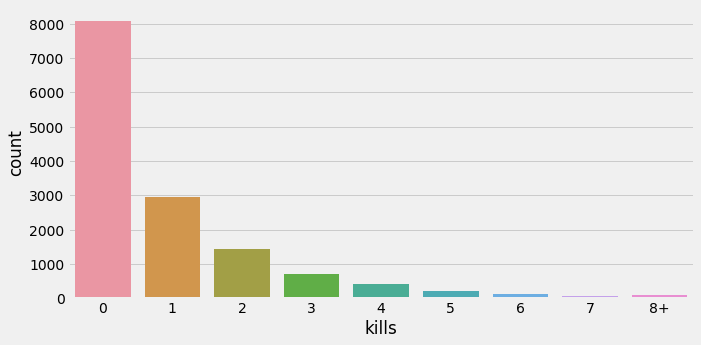

In [12]:
df1 = df.copy()
df1.loc[df1['kills'] > df1['kills'].quantile(0.99)] = '8+'

plt.figure(figsize=(10, 5))

sns.countplot(df1['kills'].astype('str').sort_values())

plt.show()

From the count plot, we can observe that majority have 0 kills in a single game.

### Group the players based on number of kills

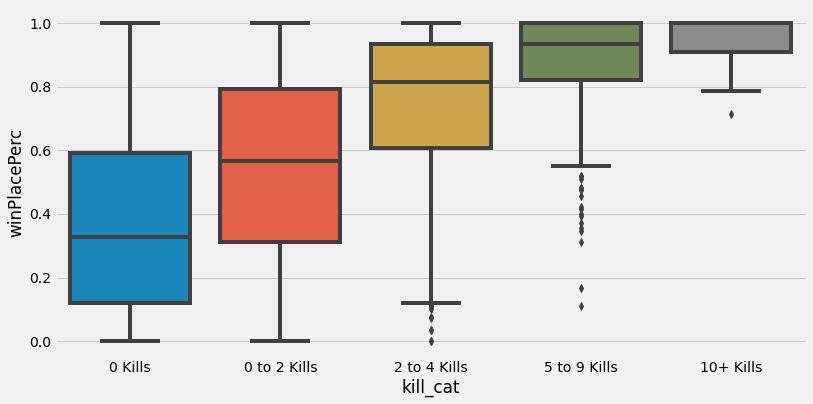

In [17]:
kills = df.copy()
kills['kill_cat'] = pd.cut(x=kills['kills'], bins=[-1, 0, 2, 5, 10, 60], 
                           labels=['0 Kills', '0 to 2 Kills', '2 to 4 Kills', 
                                   '5 to 9 Kills', '10+ Kills'])

plt.figure(figsize=(12, 6))

sns.boxplot(data=kills, x='kill_cat', y='winPlacePerc')

plt.show()

### Walking Distance on Winning Percentage

In [20]:
walking = df.copy()
walking['walkDistance'].mean()

# An average player walks 1000 meters in a single game.

1152.0128480016976

In [22]:
walking['walkDistance'].quantile(0.99)
# 99% of players walk 4000 meters in a single game.

4349.559999999998

In [23]:
walking = walking[walking['walkDistance'] < walking['walkDistance'].quantile(0.99)]

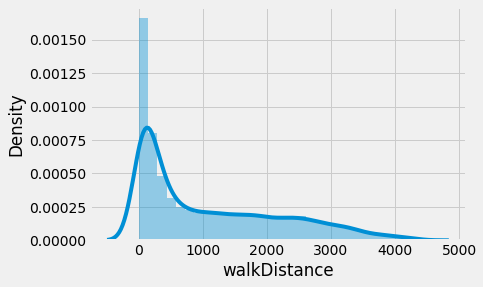

In [25]:
sns.distplot(walking['walkDistance'])
plt.show()

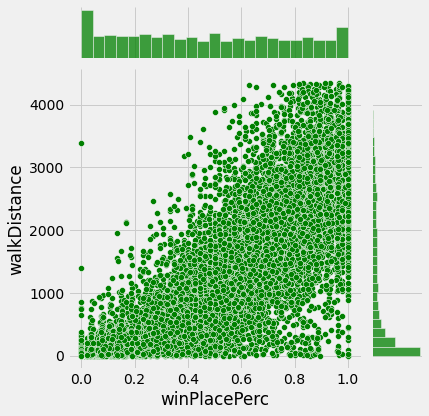

In [27]:
sns.jointplot(data=walking, x='winPlacePerc', y='walkDistance', color='green')
plt.show()

### Does destroying vehicle has impact on winning percentage?

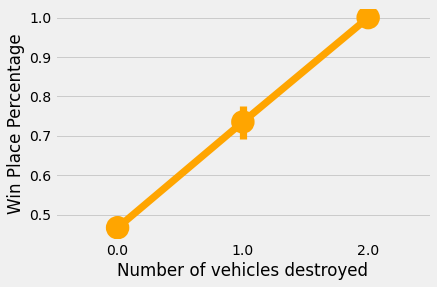

In [28]:
sns.pointplot(data=walking, x='vehicleDestroys', y='winPlacePerc', color='orange', alpha=0.8)

plt.xlabel('Number of vehicles destroyed')
plt.ylabel('Win Place Percentage')

plt.show()

### Does Usage of Healing and Boosting have an impact on Winnig?

In [30]:
df['heals'].mean()
# average heals per player is 1.

1.3878907907766305

In [32]:
df['heals'].quantile(0.8)
# 80% of players use 2 heals per game.

2.0

In [34]:
df['boosts'].mean()
# average boosts per player is 1.

1.1248408544348565

In [37]:
df['boosts'].quantile(0.99)
# 99% of players use 7 boosts or less per game.

7.0

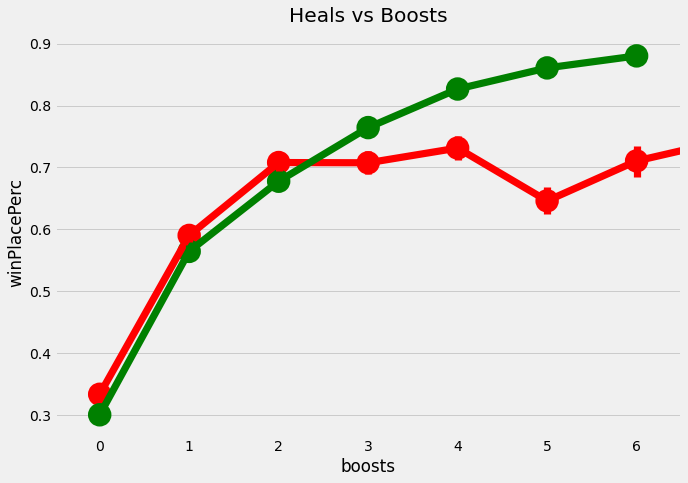

In [53]:
new_df = df.copy()
new_df = new_df[new_df['heals'] < new_df['heals'].quantile(0.99)]
new_df = new_df[new_df['boosts'] < new_df['boosts'].quantile(0.99)]

plt.figure(figsize=(10, 7))

sns.pointplot(data=new_df, x='heals', y='winPlacePerc', color='red', alpha=0.6)
sns.pointplot(data=new_df, x='boosts', y='winPlacePerc', color='green', alpha=0.6)

plt.title('Heals vs Boosts')

plt.show()

### Observe the pattern of killing of Solo, Duo & Squad matches

In [39]:
solo = df[df['numGroups'] > 50]
duo = df[(df['numGroups'] > 25) & (df['numGroups'] <= 50)]
squad = df[(df['numGroups'] <= 25)]

In [41]:
print(f'There are {len(solo)} solo games and its about {len(solo) / len(df)} % of the total data.')
print(f'There are {len(duo)} duo games and its about {len(duo) / len(df)} % of the total data.')
print(f'There are {len(squad)} squad games and its about {len(squad) / len(df)} % of the total data.')

There are 2242 solo games and its about 0.15857971424529638 % of the total data.
There are 10492 duo games and its about 0.7421134531051068 % of the total data.
There are 1404 squad games and its about 0.09930683264959683 % of the total data.


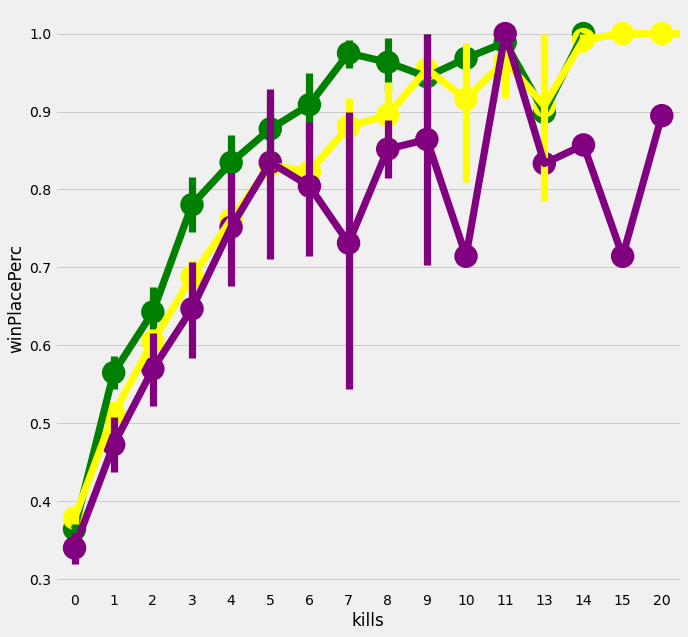

In [43]:
plt.figure(figsize=(10, 10))

sns.pointplot(data=solo, x='kills', y='winPlacePerc', color='green', alpha=0.6)
sns.pointplot(data=duo, x='kills', y='winPlacePerc', color='yellow', alpha=0.6)
sns.pointplot(data=squad, x='kills', y='winPlacePerc', color='purple', alpha=0.6)

plt.show()

### Correlation

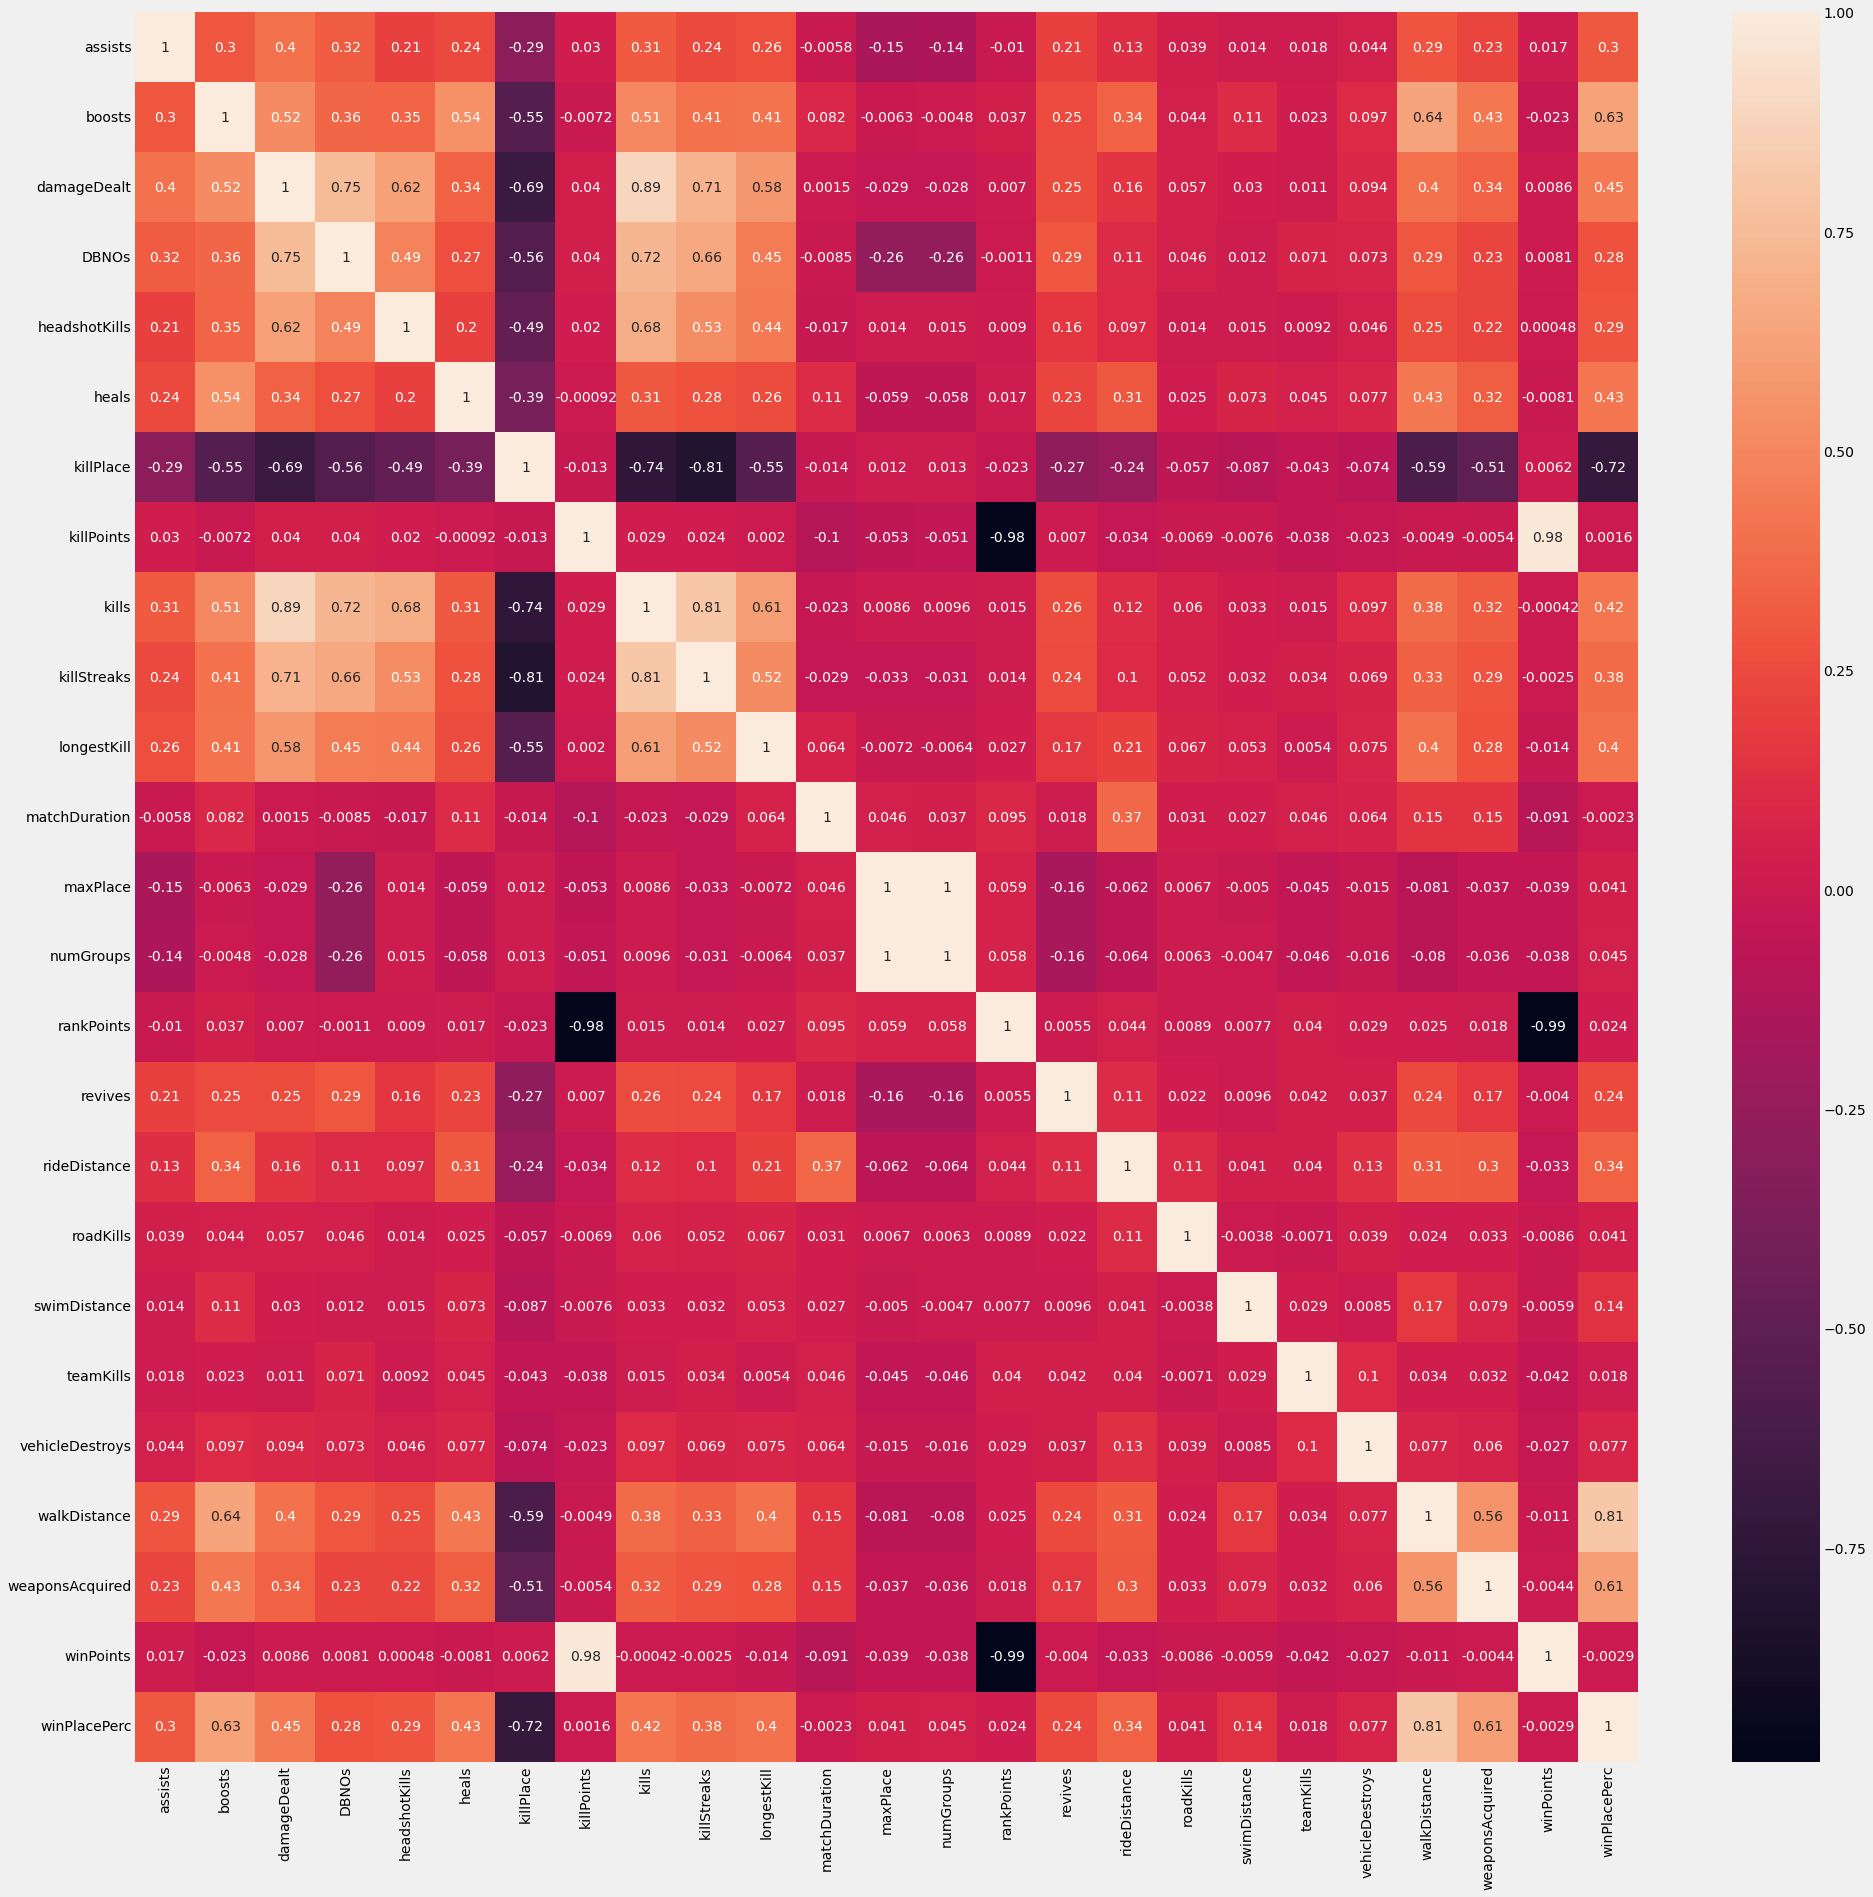

In [57]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Visualize Top 7 most correlated features

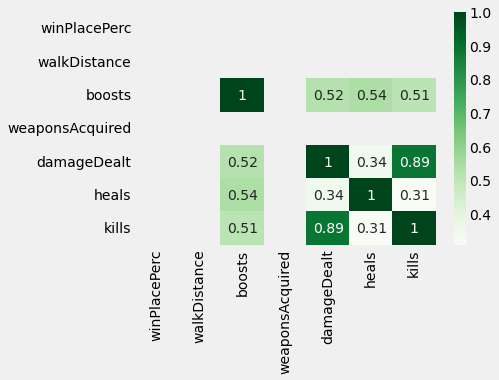

In [64]:
col = df.corr().nlargest(7, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[col].values.T)

sns.heatmap(cm, annot=True, yticklabels=col.values, xticklabels=col.values, cmap='Greens')
plt.show()